In [67]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [47]:
message = pd.read_csv('SMSSpamCollection',sep='\t', names=['label','message'])

In [48]:
message.head(2)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [49]:
message.shape

(5572, 2)

In [50]:
# data cleaning

In [51]:
ps = PorterStemmer()
stop_word = set(stopwords.words('english'))
corpus = []

In [52]:
for i in range(0,len(message)):
    review = re.sub('[^a-zA-z]',' ',message['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stop_word]
    review = ' '.join(review)
    corpus.append(review)

In [53]:
cv = CountVectorizer(max_features=5000) # selecting random frquent columns
X = cv.fit_transform(corpus).toarray()
y = pd.get_dummies(message['label'], dtype=int)
y = y.iloc[:,1].values

In [54]:
X.shape, X

((5572, 5000),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64))

In [55]:
y.shape,y

((5572,), array([0, 0, 1, ..., 0, 0, 0]))

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [60]:
spam_detect_model = MultinomialNB().fit(X_train,y_train)
y_pred = spam_detect_model.predict(X_test)

In [61]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [65]:
confusion_mat = confusion_matrix(y_test,y_pred)

In [66]:
confusion_mat

array([[1424,   24],
       [  10,  214]], dtype=int64)

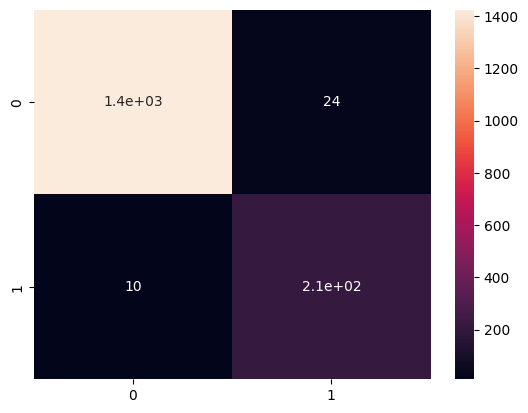

In [71]:
sns.heatmap(confusion_mat,annot=True)
plt.show()

In [69]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9796650717703349